In [2]:
import numpy as np
from noise_grid_average import noise_grid_average
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%reload_ext autoreload
%autoreload 2

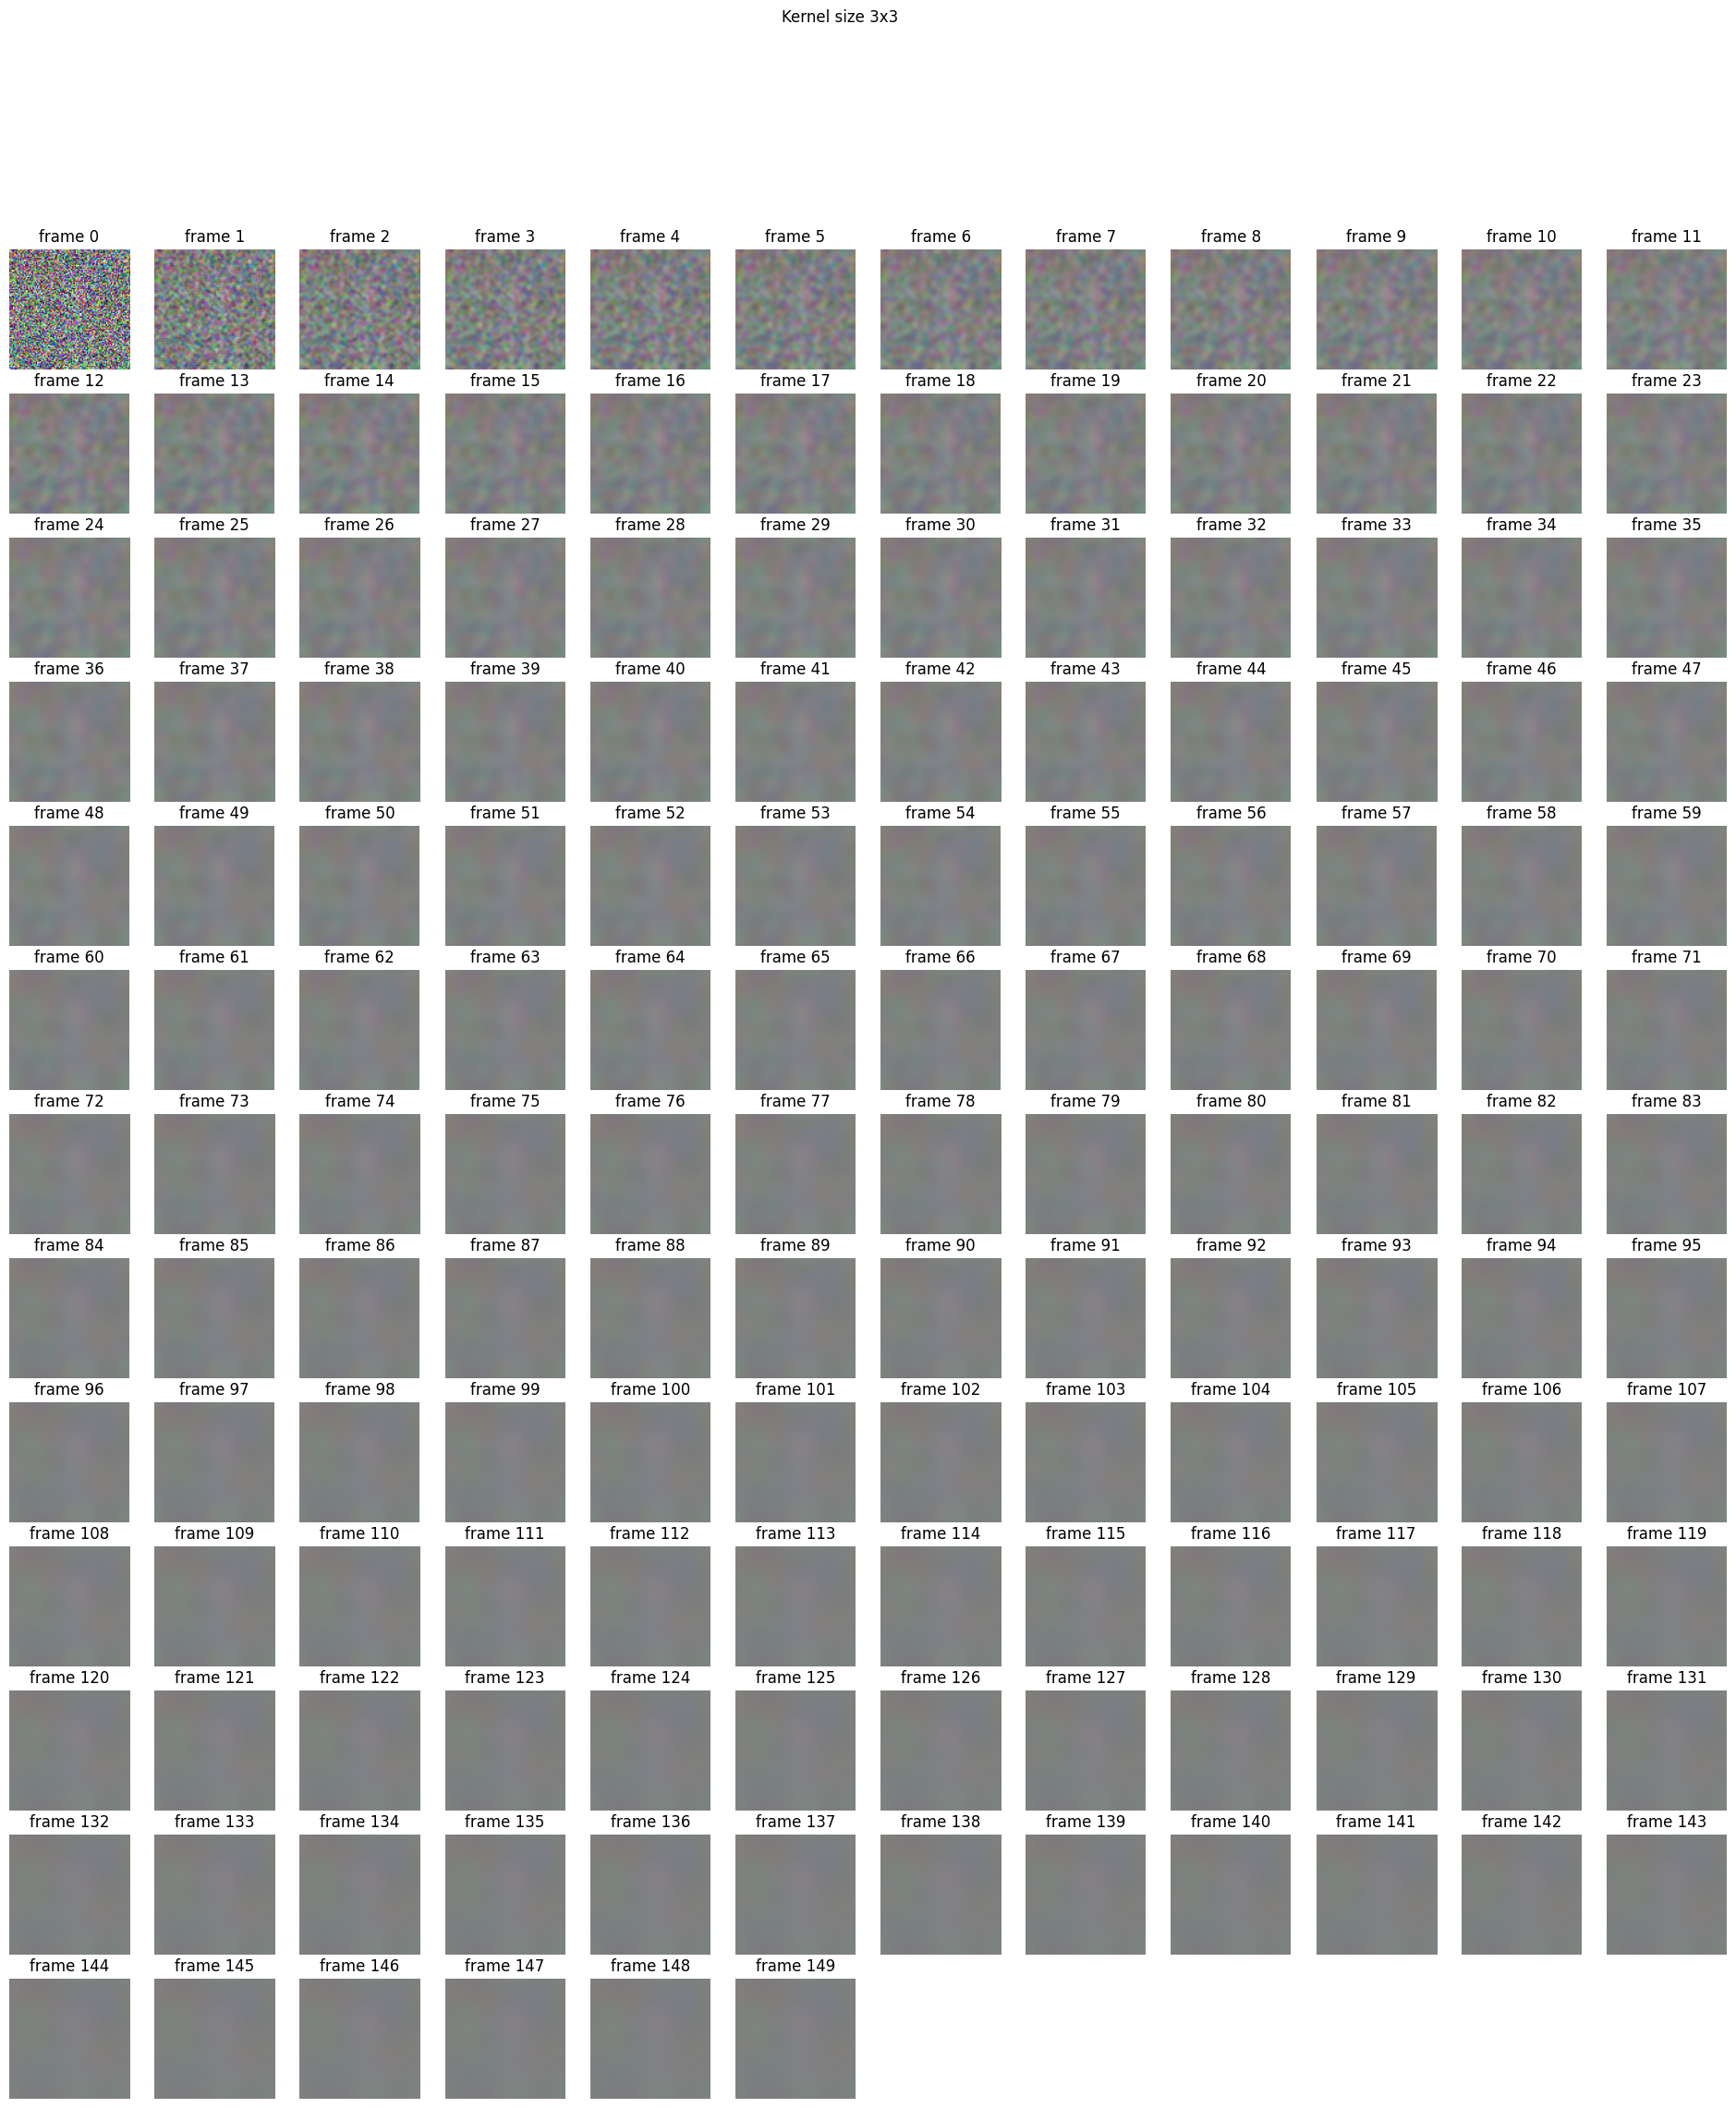

In [15]:
kernel_size = 3
num_frames = 150
h = int(np.floor(np.sqrt(num_frames)))
w = int(np.ceil(num_frames/h))
grids = noise_grid_average(num_frames, 100, 100, kernel_size)
fig, axes = plt.subplots(w, h, figsize=(h*2, w*2))
fig.suptitle(f'Kernel size {kernel_size}x{kernel_size}')
for i, ax in enumerate(axes.flat):
    if i < num_frames:
        ax.imshow(grids[i])
        ax.set_title(f'frame {i}')
    ax.axis('off')

MovieWriter ffmpeg unavailable; using Pillow instead.


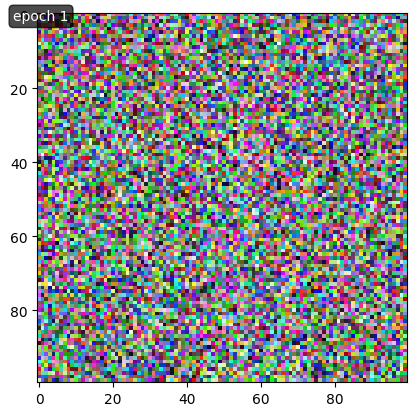

In [16]:
def animate(i):
    current_layer = grids[i,:,:,:]
    ax.clear()
    ax.imshow(current_layer)  # Convert to uint8 for correct color display
    ax.text(0.5, 0.5, f"epoch {i+1}", ha="center", va="center", fontsize=10, color="white", bbox=dict(boxstyle="round", facecolor="black", alpha=0.7))
    return ax

fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig=fig, func=animate, frames=num_frames, interval=1000, repeat=False)  # Adjust interval for playback speed
ani.save("t.gif", writer="ffmpeg", fps=5)  # Save animation to file
# plt.show()